## Example c-means

In [152]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

## Sample

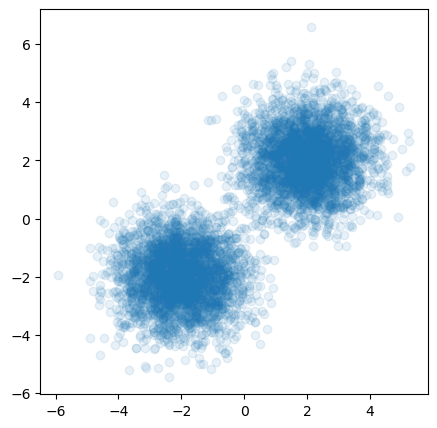

In [153]:
n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))

plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], alpha=.1)
plt.show()

In [154]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

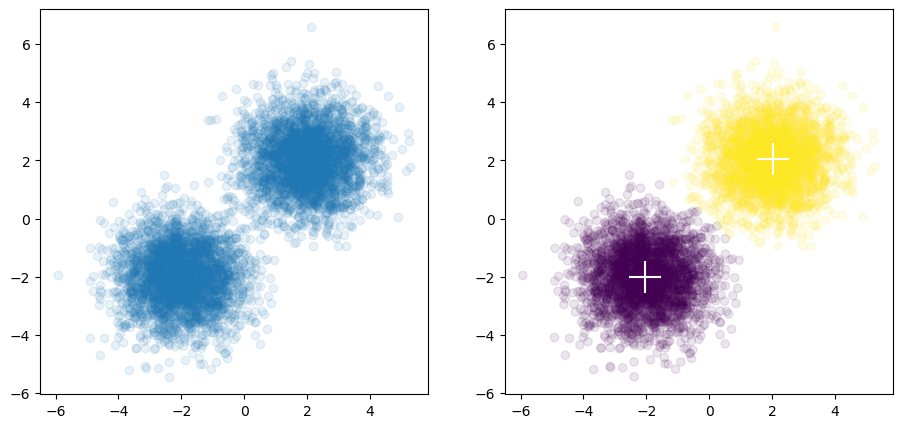

In [155]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.savefig('outputs/basic-clustering-output.jpg')
plt.show()

## Dataset (Fraud dataset in bank transactions)

In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [157]:
X = pd.read_csv('bsNET140513_032310.csv') ## financial fraud dataset
X_part, X_test = train_test_split(X, test_size=0.9) ## just for making dataset smaller
X_part['Source'] = pd.Categorical(X_part.iloc[:, 0]).codes
X_part['Target'] = pd.Categorical(X_part.iloc[:, 1]).codes
X_part['typeTrans'] = pd.Categorical(X_part.iloc[:, 3]).codes
X_part = X_part.to_numpy()
# [pd.to_numeric(X_part.iloc[:, 0], errors='coerce'), pd.to_numeric(X_part.iloc[:, 1], errors='coerce')]
# X_part

In [158]:
fcm = FCM(n_clusters=2)
fcm.fit(X_part)

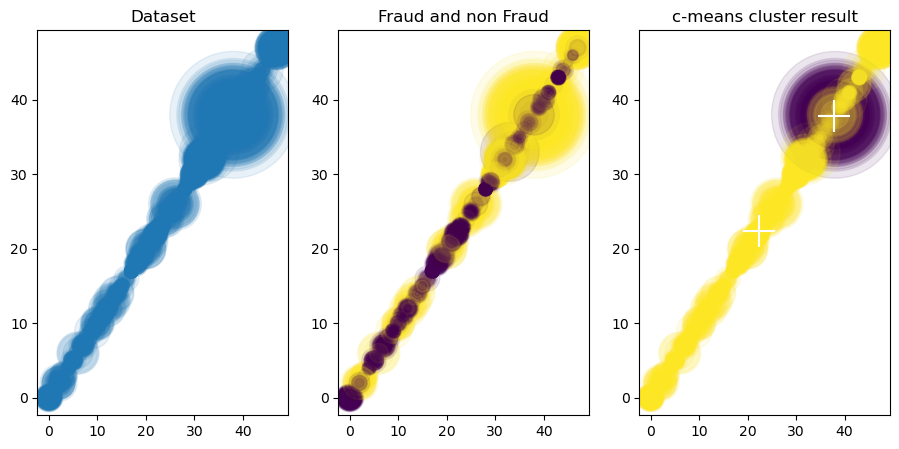

In [159]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X_part)

# plot result
f, axes = plt.subplots(1, 3, figsize=(11,5))
axes[0].scatter(X_part[:,0], X_part[:,1], X_part[:,2], alpha=.1)
axes[0].set_title("Dataset")
axes[1].scatter(X_part[:,0], X_part[:,1], X_part[:,2], c=X_part[:, 4], alpha=.1)
axes[1].set_title("Fraud and non Fraud")
axes[2].scatter(X_part[:,0], X_part[:,1], X_part[:,2], c=fcm_labels, alpha=.1)
axes[2].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
axes[2].set_title("c-means cluster result")
plt.savefig('outputs/fraud-clustering-output.jpg')
plt.show()

k-means on dataset

In [160]:
from sklearn.cluster import KMeans

In [161]:
random_state = 170
common_params = {
    "n_init": 1,
    "random_state": random_state,
}
y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X_part)

Text(0.5, 1.0, 'k-means')

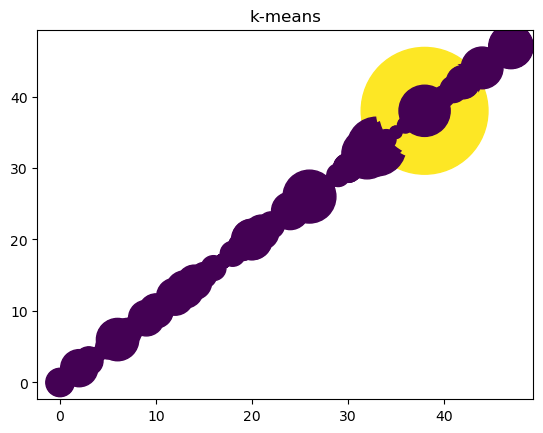

In [162]:
plt.scatter(X_part[:, 0], X_part[:, 1], X_part[:,2], c=y_pred)
plt.title("k-means")